In [9]:
%pip install matplotlib
%pip install seaborn
%pip install minimap2

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
ERROR: Could not find a version that satisfies the requirement minimap2 (from versions: none)
ERROR: No matching distribution found for minimap2
Note: you may need to restart the kernel to use updated packages.


In [1]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

FASTQ_FILE = "../dataset/SRR33470049.fastq"
REF_FASTA = "../references/Mus_musculus.GRCm39.dna_sm.primary_assembly.fa"
REF_INDEX = "../references/genome.mmi"
GTF = "../references/Mus_musculus.GRCm39.109.gtf"

ALIGN_DIR = "../results/alignment/"
os.makedirs(ALIGN_DIR, exist_ok=True)

BED_FILE = os.path.join(ALIGN_DIR, "aligned.bed")
SAM_FILE = os.path.join(ALIGN_DIR, "aligned.sam")
BAM_FILE = os.path.join(ALIGN_DIR, "aligned.bam")
SORTED_BAM = os.path.join(ALIGN_DIR, "aligned.sorted.bam")

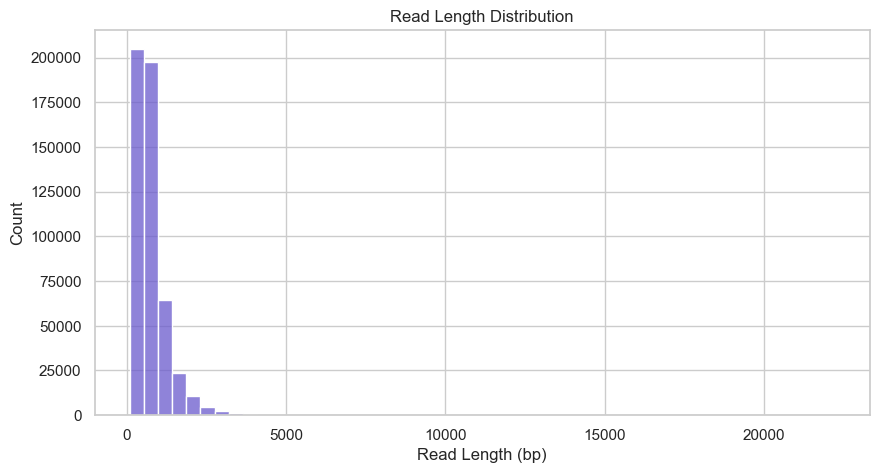

In [3]:
def read_fastq_lengths(fastq_path):
    lengths = []
    with open(fastq_path, 'r') as f:
        for i, line in enumerate(f):
            if i % 4 == 1:
                lengths.append(len(line.strip()))
    return lengths

lengths = read_fastq_lengths(FASTQ_FILE)

plt.figure(figsize=(10, 5))
sns.histplot(lengths, bins=50, color='slateblue')
plt.title("Read Length Distribution")
plt.xlabel("Read Length (bp)")
plt.ylabel("Count")
plt.show()

In [4]:
print(f"Total reads: {len(lengths)}")
print(f"Mean read length: {sum(lengths)/len(lengths):.2f} bp")

Total reads: 510727
Mean read length: 757.10 bp


In [ ]:
!minimap2 -d {REF_INDEX} {REF_FASTA}

In [5]:
!minimap2 -ax splice -uf --secondary=no -t 4 {REF_INDEX} {FASTQ_FILE} > {SAM_FILE}

[WARNING] Indexing parameters (-k, -w or -H) overridden by parameters used in the prebuilt index.
[M::main::5.700*0.88] loaded/built the index for 61 target sequence(s)
[M::mm_mapopt_update::8.060*0.85] mid_occ = 598
[M::mm_idx_stat] kmer size: 15; skip: 10; is_hpc: 0; #seq: 61
[M::mm_idx_stat::9.537*0.84] distinct minimizers: 97791701 (39.85% are singletons); average occurrences: 5.142; average spacing: 5.426; total length: 2728222451
[M::worker_pipeline::1600.087*0.82] mapped 510727 sequences
[M::main] Version: 2.30-r1287
[M::main] CMD: minimap2 -ax splice -uf --secondary=no -t 4 ../references/genome.mmi ../dataset/SRR33470049.fastq
[M::main] Real time: 1600.791 sec; CPU: 1308.580 sec; Peak RSS: 3.418 GB


In [2]:
!samtools view -bS {SAM_FILE} > {BAM_FILE}
!samtools sort {BAM_FILE} -o {SORTED_BAM}
!samtools index {SORTED_BAM}

In [3]:
!samtools flagstat {SORTED_BAM}

602473 + 0 in total (QC-passed reads + QC-failed reads)
510727 + 0 primary
0 + 0 secondary
91746 + 0 supplementary
0 + 0 duplicates
0 + 0 primary duplicates
547012 + 0 mapped (90.79% : N/A)
455266 + 0 primary mapped (89.14% : N/A)
0 + 0 paired in sequencing
0 + 0 read1
0 + 0 read2
0 + 0 properly paired (N/A : N/A)
0 + 0 with itself and mate mapped
0 + 0 singletons (N/A : N/A)
0 + 0 with mate mapped to a different chr
0 + 0 with mate mapped to a different chr (mapQ>=5)


In [2]:
# FLAIR output
FLAIR_DIR = "../results/flair"
os.makedirs(FLAIR_DIR, exist_ok=True)

In [3]:
!bedtools bamtobed -bed12 -i ../results/alignment/aligned.bam > ../results/alignment/aligned.bed

In [6]:
!flair correct \
  -q {BED_FILE} \
  -g {REF_FASTA} \
  -f {GTF} \
  -o {FLAIR_DIR}/flair_corrected

/Users/s1ffre/miniconda3/envs/flair_work_pls/lib/python3.12/site-packages/ncls/__init__.py:2: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources
/Users/s1ffre/miniconda3/envs/flair_work_pls/lib/python3.12/site-packages/ncls/__init__.py:2: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources
/Users/s1ffre/miniconda3/envs/flair_work_pls/lib/python3.12/site-packages/ncls/__init__.py:2: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Ref

In [9]:
print(FASTQ_FILE)

../dataset/SRR33470049.fastq


In [3]:
!flair collapse \
  -g {REF_FASTA} \
  -r {"../dataset/SRR33470049.fastq"} \
  -q {FLAIR_DIR}/flair_corrected_all_corrected.bed \
  -f {GTF} \
  -o {FLAIR_DIR}/flair_collapsed

Writing temporary files to /var/folders/pc/0_6d1f7d5j765q5qfcgmpqj00000gn/T/tmpj2shx434/	
collapse_isoforms_precise.py -q ../results/flair/flair_corrected_all_corrected.bed -t 4 -m 2 -w 100 -n none -o ../results/flair/flair_collapsed.firstpass.unfiltered.bed -f ../references/Mus_musculus.GRCm39.109.gtf
Renaming isoforms using gtf
Aligning reads to first-pass isoform reference
Aligning reads to firstpass transcripts
Counting supporting reads for firstpass transcripts
minimap2 -a -t 4 -N 4 --MD ../results/flair/flair_collapsed.firstpass.fa ../dataset/SRR33470049.fastq
count_sam_transcripts.py --sam - -o ../results/flair/flair_collapsed.firstpass.q.counts -t 4 --quality 0 -w 100
Filtering isoforms by read coverage
Flair collapse took 1 minutes and 33 seconds and finished without issues.

FLAIR HAS FINISHED


In [7]:
with open("../manifest.tsv", "w") as f:
    f.write("SRR33470049\tflair_corrected_all_corrected.bed\tSRR33470049.fastq\taligned.bam\n")

In [17]:
with open("manifest.tsv") as f:
    for line in f:
        print(repr(line))

import os
print("manifest.tsv exists?", os.path.isfile("manifest.tsv"))

with open("manifest.tsv", "r") as f:
    for i, line in enumerate(f):
        parts = line.strip().split("\t")
        print(f"Line {i+1}: {len(parts)} columns -> {parts}")

'SRR33470049\t./results/flair/flair_corrected_all_corrected.bed\t./dataset/SRR33470049.fastq\t./results/alignment/aligned.bam'
manifest.tsv exists? True
Line 1: 4 columns -> ['SRR33470049', './results/flair/flair_corrected_all_corrected.bed', './dataset/SRR33470049.fastq', './results/alignment/aligned.bam']


In [21]:
!flair quantify \
  -r ./manifest.tsv \
  -i {FLAIR_DIR}/flair_collapsed.isoforms.fa \
  -t 4 \
  -o {FLAIR_DIR}/flair_quant

Writing temporary files with prefixes similar to /var/folders/pc/0_6d1f7d5j765q5qfcgmpqj00000gn/T/tmp6imb_in0
Step 1/3. Aligning sample SRR33470049_nobatch, 1/1 
Step 2/3. Quantifying isoforms for sample SRR33470049_nobatch: 1/1 
Step 3/3. Writing counts to ../results/flair/flair_quant.counts.tsv 

Flair quantify took 0 minutes and 51 seconds and finished without issues.

FLAIR HAS FINISHED


In [28]:
import pandas as pd

counts = pd.read_csv("../results/flair/flair_quant.counts.tsv", sep="\t", header=None)
print("Number of columns:", counts.shape[1])
print(counts.head())

Number of columns: 2
                                       0                                1
0                                    ids  SRR33470049_nocondition_nobatch
1  ENSMUST00000000058_ENSMUSG00000000058                            201.0
2  ENSMUST00000000080_ENSMUSG00000000078                             16.0
3  ENSMUST00000000090_ENSMUSG00000000088                            144.0
4  ENSMUST00000000175_ENSMUSG00000000171                             75.0


In [32]:
import pandas as pd

counts = pd.read_csv("../results/flair/flair_quant.counts.tsv", sep="\t", header=0)
counts.columns = ["transcript_gene", "counts"]
counts[['transcript_id', 'gene_id']] = counts['transcript_gene'].str.split('_', expand=True)
counts['counts'] = counts['counts'].astype(int)
counts.head()

,transcript_gene,counts,transcript_id,gene_id
0,ENSMUST00000000058_ENSMUSG00000000058,201,ENSMUST00000000058,ENSMUSG00000000058
1,ENSMUST00000000080_ENSMUSG00000000078,16,ENSMUST00000000080,ENSMUSG00000000078
2,ENSMUST00000000090_ENSMUSG00000000088,144,ENSMUST00000000090,ENSMUSG00000000088
3,ENSMUST00000000175_ENSMUSG00000000171,75,ENSMUST00000000175,ENSMUSG00000000171
4,ENSMUST00000000193_ENSMUSG00000035385,3,ENSMUST00000000193,ENSMUSG00000035385


In [65]:
known_isoforms = counts[counts['transcript_id'].str.startswith('ENS')]
novel_isoforms = counts[~counts['transcript_id'].str.startswith('ENS')]

counts['isoform_type'] = counts['transcript_id'].apply(
    lambda x: 'known' if x.startswith('ENSMUST') else 'novel'
)

# Show the count of both the novel/known isoforms from the aboev step
print(counts['isoform_type'].value_counts())

isoform_type
novel    11394
known     4272
Name: count, dtype: int64


                count       mean         std  min  25%   50%   75%     max
isoform_type                                                              
known          4272.0  38.118914  128.747728  1.0  7.0  15.0  33.0  6255.0
novel         11394.0  16.163683   77.989310  1.0  4.0   7.0  12.0  3586.0


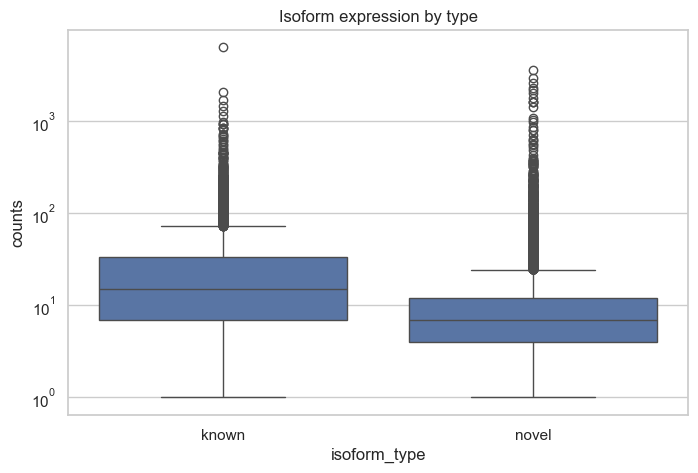

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

# Summary stats
print(counts.groupby('isoform_type')['counts'].describe())

# Plot distributions
plt.figure(figsize=(8,5))
sns.boxplot(x='isoform_type', y='counts', data=counts)
plt.yscale('log')  # Counts often vary a lot
plt.title('Isoform expression by type')
plt.savefig('isoform_expression_by_type')
plt.show()

In [49]:
high_exp_novel = counts[(counts['isoform_type'] == 'novel') & (counts['counts'] > 100)]
print(high_exp_novel)

                            transcript_gene  counts       transcript_id  \
4370            SRR33470049.103477_MT:15000     173  SRR33470049.103477   
4453         SRR33470049.107081_X:108205000     102  SRR33470049.107081   
4500   SRR33470049.10902_ENSMUSG00000062353     122   SRR33470049.10902   
4613          SRR33470049.113587_8:69357000     254  SRR33470049.113587   
4635          SRR33470049.114391_3:86579000     199  SRR33470049.114391   
...                                     ...     ...                 ...   
15350         SRR33470049.88432_1:172100000     103   SRR33470049.88432   
15380   SRR33470049.8953_ENSMUSG00000115783     706    SRR33470049.8953   
15451   SRR33470049.9226_ENSMUSG00000041653     123    SRR33470049.9226   
15491   SRR33470049.9375_ENSMUSG00000042312     117    SRR33470049.9375   
15612          SRR33470049.98108_6:88802000     121   SRR33470049.98108   

                  gene_id isoform_type  
4370             MT:15000        novel  
4453          X:1

In [51]:
novel_isoforms = counts[counts['isoform_type'] == 'novel']
novel_genes = novel_isoforms['gene_id'].unique()
print(f"Number of genes with novel isoforms: {len(novel_genes)}")
print("Example gene IDs:", novel_genes[:10])

Number of genes with novel isoforms: 10482
Example gene IDs: ['13:99123000' '5:124256000' 'ENSMUSG00000019929' '11:106139000'
 'ENSMUSG00000028010' '10:12884000' '17:28294000' '19:54021000'
 '11:53247000' '11:105949000']


In [52]:
novel_counts_per_gene = novel_isoforms.groupby('gene_id').size().reset_index(name='novel_isoform_count')
novel_counts_per_gene = novel_counts_per_gene.sort_values('novel_isoform_count', ascending=False)
print(novel_counts_per_gene.head(10))

                  gene_id  novel_isoform_count
9463   ENSMUSG00000045983                    8
7403   ENSMUSG00000002944                    7
5704          6:119330000                    6
9711   ENSMUSG00000061232                    6
8084   ENSMUSG00000024393                    6
10039  ENSMUSG00000090625                    5
7564   ENSMUSG00000012705                    5
9721   ENSMUSG00000061780                    5
9882   ENSMUSG00000073418                    5
8180   ENSMUSG00000025369                    5


In [37]:
known_isoforms.sort_values('counts', ascending=False).head(10)
novel_isoforms.sort_values('counts', ascending=False).head(10)

,transcript_gene,counts,transcript_id,gene_id
12849,SRR33470049.443843_ENSMUSG00000064357,3586,SRR33470049.443843,ENSMUSG00000064357
8846,SRR33470049.27951_MT:15000,2909,SRR33470049.27951,MT:15000
12321,SRR33470049.42182_ENSMUSG00000064341,2603,SRR33470049.42182,ENSMUSG00000064341
14460,SRR33470049.545_ENSMUSG00000062515,2247,SRR33470049.545,ENSMUSG00000062515
7378,SRR33470049.221763_8:69358000,2158,SRR33470049.221763,8:69358000
7224,SRR33470049.215908_ENSMUSG00000102070,1990,SRR33470049.215908,ENSMUSG00000102070
10556,SRR33470049.34876_MT:12000,1755,SRR33470049.34876,MT:12000
14667,SRR33470049.61644_MT:6000,1620,SRR33470049.61644,MT:6000
9857,SRR33470049.319875_MT:4000,1592,SRR33470049.319875,MT:4000
12691,SRR33470049.437036_ENSMUSG00000101249,1587,SRR33470049.437036,ENSMUSG00000101249


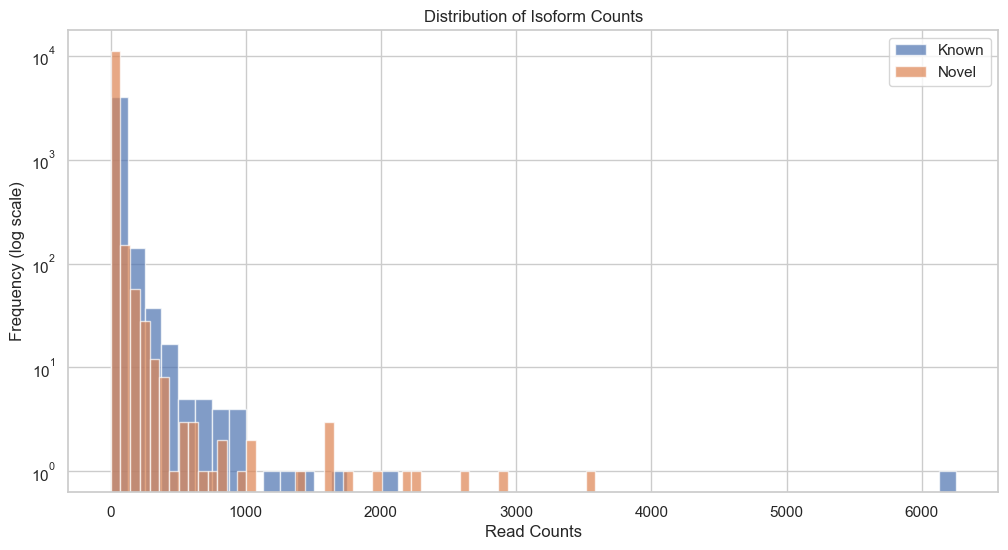

In [62]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.hist(known_isoforms['counts'], bins=50, alpha=0.7, label='Known')
plt.hist(novel_isoforms['counts'], bins=50, alpha=0.7, label='Novel')
plt.yscale('log')
plt.xlabel('Read Counts')
plt.ylabel('Frequency (log scale)')
plt.legend()
plt.title('Distribution of Isoform Counts')
plt.savefig('distribution_of_isoform_counts')
plt.show()

In [33]:
top = counts.sort_values(by="counts", ascending=False).head(10)
print(top)

                               transcript_gene  counts         transcript_id  \
1076   ENSMUST00000029076-1_ENSMUSG00000027559    6255  ENSMUST00000029076-1   
12849    SRR33470049.443843_ENSMUSG00000064357    3586    SRR33470049.443843   
8846                SRR33470049.27951_MT:15000    2909     SRR33470049.27951   
12321     SRR33470049.42182_ENSMUSG00000064341    2603     SRR33470049.42182   
14460       SRR33470049.545_ENSMUSG00000062515    2247       SRR33470049.545   
7378             SRR33470049.221763_8:69358000    2158    SRR33470049.221763   
3804     ENSMUST00000173739_ENSMUSG00000002985    2048    ENSMUST00000173739   
7224     SRR33470049.215908_ENSMUSG00000102070    1990    SRR33470049.215908   
10556               SRR33470049.34876_MT:12000    1755     SRR33470049.34876   
980      ENSMUST00000027634_ENSMUSG00000026385    1683    ENSMUST00000027634   

                  gene_id  
1076   ENSMUSG00000027559  
12849  ENSMUSG00000064357  
8846             MT:15000  
12321  

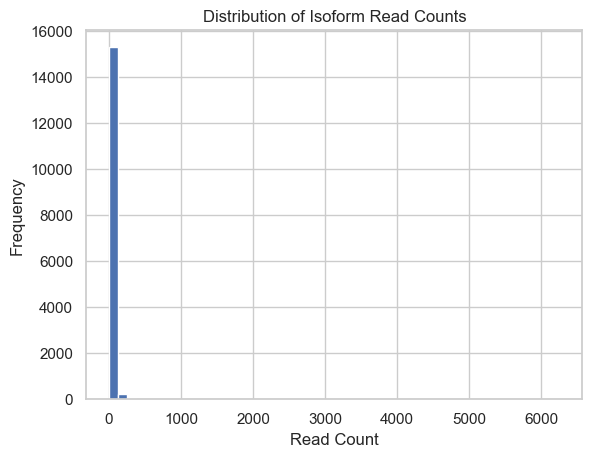

In [34]:
import matplotlib.pyplot as plt

counts['counts'].hist(bins=50)
plt.title("Distribution of Isoform Read Counts")
plt.xlabel("Read Count")
plt.ylabel("Frequency")
plt.show()

In [53]:
import pandas as pd
import gzip

# Parse GTF to extract gene_id ↔ gene_name mapping
def parse_gtf_attributes(attribute_string):
    attributes = {}
    for item in attribute_string.strip().split(';'):
        if item:
            key, value = item.strip().split(' ')
            attributes[key] = value.strip('"')
    return attributes

# gtf_file = "../references/Mus_musculus.GRCm39.109.gtf"

gene_map = {}

with open(GTF, 'r') as fh:
    for line in fh:
        if line.startswith("#"):
            continue
        fields = line.strip().split('\t')
        if fields[2] == 'gene':
            attr = parse_gtf_attributes(fields[8])
            gene_id = attr.get('gene_id')
            gene_name = attr.get('gene_name')
            if gene_id and gene_name:
                gene_map[gene_id] = gene_name

# Convert to DataFrame
gene_map_df = pd.DataFrame(gene_map.items(), columns=["gene_id", "gene_name"])

In [54]:
# Merge with your previous DataFrame
merged = novel_counts_per_gene.merge(gene_map_df, on="gene_id", how="left")

# Fill in missing gene names
merged['gene_name'] = merged['gene_name'].fillna("NA")

# Sort and display
merged = merged.sort_values('novel_isoform_count', ascending=False)
merged.head(10)


,gene_id,novel_isoform_count,gene_name
0,ENSMUSG00000045983,8,Eif4g1
1,ENSMUSG00000002944,7,Cd36
2,6:119330000,6,NA
3,ENSMUSG00000061232,6,H2-K1
4,ENSMUSG00000024393,6,Prrc2a
11,ENSMUSG00000036570,5,Fxyd1
14,5:18470000,5,NA
13,ENSMUSG00000032637,5,Atxn2l
12,9:123135000,5,NA
10,ENSMUSG00000024991,5,Eif3a


In [55]:
# Save as CSV
merged.to_csv("novel_isoform_summary.csv", index=False)

# Also export top 20 in markdown for GitHub README if you want
top_20_md = merged.head(20).to_markdown(index=False)
with open("top20_novel_genes.md", "w") as f:
    f.write(top_20_md)

/var/folders/pc/0_6d1f7d5j765q5qfcgmpqj00000gn/T/ipykernel_60562/1977985687.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_n, x='counts', y='gene_name', palette="mako")


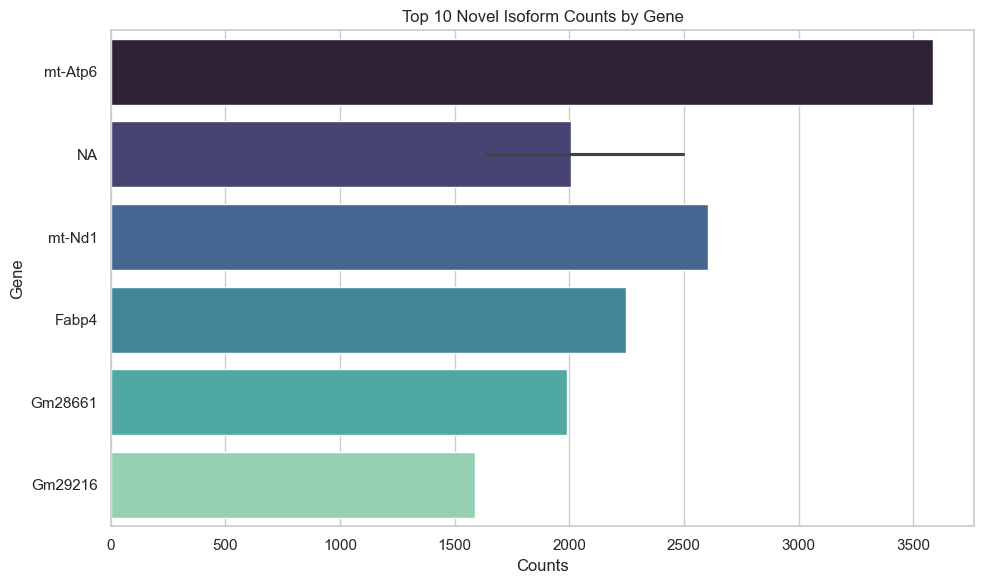

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

# Merge original novel isoforms table with gene names
novel_isoforms_named = novel_isoforms.merge(gene_map_df, on="gene_id", how="left")
novel_isoforms_named['gene_name'] = novel_isoforms_named['gene_name'].fillna("NA")

# Plot top 10 expressed novel isoforms
top_n = novel_isoforms_named.sort_values("counts", ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(data=top_n, x='counts', y='gene_name', palette="mako")
plt.title("Top 10 Novel Isoform Counts by Gene")
plt.xlabel("Counts")
plt.ylabel("Gene")
plt.tight_layout()
plt.savefig('top_10_novel_isoform_counts_by_gene.png')
plt.show()

In [58]:
top_expressed_novels = novel_isoforms.sort_values("counts", ascending=False).head(10)
print(top_expressed_novels[['transcript_id', 'gene_id', 'counts']])

            transcript_id             gene_id  counts
12849  SRR33470049.443843  ENSMUSG00000064357    3586
8846    SRR33470049.27951            MT:15000    2909
12321   SRR33470049.42182  ENSMUSG00000064341    2603
14460     SRR33470049.545  ENSMUSG00000062515    2247
7378   SRR33470049.221763          8:69358000    2158
7224   SRR33470049.215908  ENSMUSG00000102070    1990
10556   SRR33470049.34876            MT:12000    1755
14667   SRR33470049.61644             MT:6000    1620
9857   SRR33470049.319875             MT:4000    1592
12691  SRR33470049.437036  ENSMUSG00000101249    1587


In [59]:
# Check if gene_id contains 'MT'
mito_novels = novel_isoforms[novel_isoforms['gene_id'].str.contains('MT', na=False)]
print(f"Novel isoforms from mitochondrial genes: {mito_novels.shape[0]}")

Novel isoforms from mitochondrial genes: 30
